In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
directory = os.path.join('sample_data', 'california_housing_train.csv')

if os.path.isfile(directory):
  print('File ditemukan')

File ditemukan


In [ ]:
dataset = pd.read_csv(directory)

In [ ]:
print(dataset.dtypes.tolist())

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


In [ ]:
dataset_numbers = dataset.select_dtypes(include = ['float64'])

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() 

dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
feature = dataset.drop(['median_house_value'], axis=1)
label = dataset['median_house_value']

feature_scaled = scaler.fit_transform(feature.values)
label_scaled = scaler.fit_transform(dataset['median_house_value'].values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.2)

**Linear Regression**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
lin_reg = linear_model.LinearRegression()
lin_reg.fit(feature_train,label_train)
r2_score(lin_reg.predict(feature_train),label_train)

0.44032267214224996

In [ ]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(lin_reg, feature_train,label_train, cv=10 )
reg_score = r2_score(lin_reg.predict(feature_test), label_test)

print(cvs)
print(reg_score)

[0.64467875 0.66275059 0.62669764 0.623914   0.62341231 0.6470124
 0.58427018 0.66897226 0.64458274 0.66322892]
0.45788807539221965


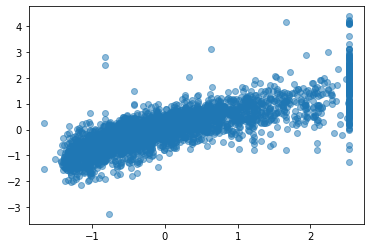

In [ ]:
predictions = lin_reg.predict(feature_test)
plt.scatter(label_test, predictions, alpha=0.5)

**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(feature_train, label_train)

r2_score(tree_reg.predict(feature_train), label_train)

0.9999999999999571

In [ ]:
cross_val_score(tree_reg, feature_train, label_train, cv=10)

array([0.61480336, 0.59287052, 0.62853349, 0.62470894, 0.69347349,
       0.62578115, 0.60993449, 0.63211166, 0.68188035, 0.64275835])

In [ ]:
tree_score = r2_score(tree_reg.predict(feature_test), label_test)
tree_score

0.6489727579839708

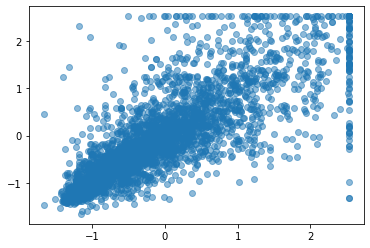

In [ ]:
predictions = tree_reg.predict(feature_test)
plt.scatter(label_test, predictions, alpha=0.5)

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_reg.fit(feature_train, label_train)
r2_score(forest_reg.predict(feature_train), label_train)
cross_validation_score = cross_val_score(forest_reg, feature_train, label_train, cv=10)

print(cross_validation_score)

[0.80448563 0.81293563 0.802766   0.82141122 0.82657385 0.83140358
 0.80910105 0.82082083 0.83379466 0.82232662]


In [ ]:
forest_score = r2_score(forest_reg.predict(feature_test), label_test)
forest_score

0.7698269289826988

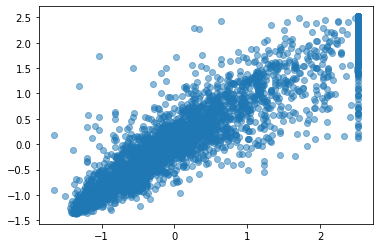

In [ ]:
predictions = forest_reg.predict(feature_test)
plt.scatter(label_test, predictions, alpha=0.5)

**SVR**

In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel = 'rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(feature_train, label_train)
score_rbf = r2_score(svr_rbf.predict(feature_test), label_test)
cross_validation_score = cross_val_score(svr_rbf, feature_train, label_train, cv=10)

print(cross_validation_score)

[0.77846487 0.77687235 0.76966894 0.75943951 0.7667643  0.7726462
 0.77411415 0.77956955 0.78234129 0.79204213]


In [ ]:
svr_score = r2_score(svr_rbf.predict(feature_test), label_test)
svr_score

0.7195383042107901

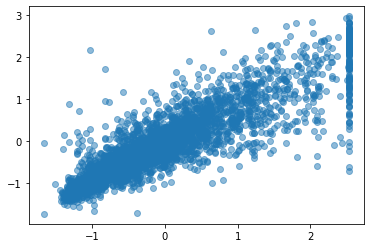

In [ ]:
predictions = svr_rbf.predict(feature_test)
plt.scatter(label_test, predictions, alpha=0.5)

**Ridge Regression**

In [ ]:
from sklearn import linear_model
rid_reg = linear_model.Ridge(alpha = .5)
rid_reg.fit(feature_train, label_train)
r2_score(rid_reg.predict(feature_train), label_train)
cross_validation_score = cross_val_score(rid_reg, feature_train, label_train, cv=10)

print(cross_validation_score)


[0.6446792  0.66273802 0.62669575 0.62390945 0.62340517 0.6470251
 0.58428716 0.6689828  0.64459396 0.66322888]


In [ ]:
ridge_score = r2_score(rid_reg.predict(feature_test), label_test)
ridge_score

0.45777235723362064

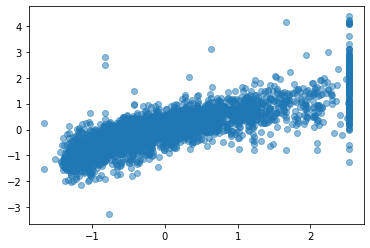

In [ ]:
predictions = rid_reg.predict(feature_test)
plt.scatter(label_test, predictions, alpha=0.5)

**Lasso**

In [ ]:
from sklearn import linear_model
las_reg = linear_model.Lasso(alpha=.1)
las_reg.fit(feature_train, label_train)
r2_score(las_reg.predict(feature_train), label_train)
cross_validation_score = cross_val_score(las_reg, feature_train, label_train, cv=10)

print(cross_validation_score)

[0.48985868 0.51237352 0.48129614 0.46717631 0.45632612 0.51522315
 0.46901257 0.51574492 0.50914104 0.50324488]


In [ ]:
lasso_score = r2_score(las_reg.predict(feature_test), label_test)
lasso_score

-0.31226985792957085

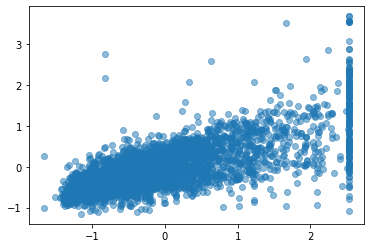

In [ ]:
predictions = las_reg.predict(feature_test)
plt.scatter(label_test, predictions, alpha=0.5)

**Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet
el_reg = ElasticNet(alpha=.1)

el_reg.fit(feature_train, label_train)
r2_score(el_reg.predict(feature_train), label_train)
cross_validation_score = cross_val_score(el_reg, feature_train, label_train, cv=10)

print(cross_validation_score)

[0.52568727 0.54342098 0.51819573 0.50405442 0.49339648 0.54902491
 0.50063992 0.54870571 0.54486714 0.54022311]


In [ ]:
elastic_score = r2_score(el_reg.predict(feature_test), label_test)
elastic_score

-0.12030827413059075

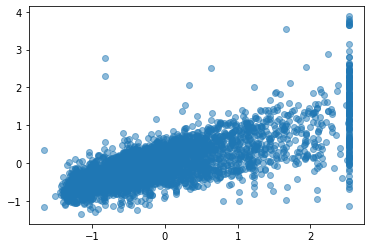

In [ ]:
predictions = el_reg.predict(feature_test)
plt.scatter(label_test, predictions, alpha=0.5)

**Least Angle Regression (Lars)**

In [ ]:
from sklearn import linear_model
lar_reg = linear_model.Lars(n_nonzero_coefs=1)

lar_reg.fit(feature_train, label_train)
r2_score(lar_reg.predict(feature_train), label_train)
cross_validation_score = cross_val_score(lar_reg, feature_train, label_train, cv=10)

print(cross_validation_score)

[0.4467481  0.46850061 0.4304292  0.4278476  0.41221499 0.47048901
 0.42848285 0.4707124  0.46028944 0.45471464]


In [ ]:
lar_score = r2_score(lar_reg.predict(feature_test), label_test)
lar_score

-0.8572259449705568

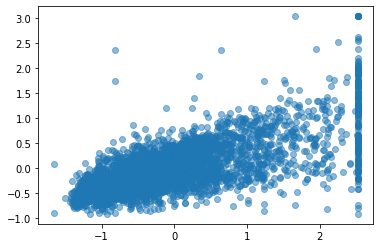

In [ ]:
predictions = lar_reg.predict(feature_test)
plt.scatter(label_test, predictions, alpha=0.5)

**XGBoost**

In [107]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(feature_train,label_train)

preds = xg_reg.predict(feature_test)
rmse = np.sqrt(mean_squared_error(label_test, preds))
print("RMSE: %f" % (rmse))

[08:51:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.825860


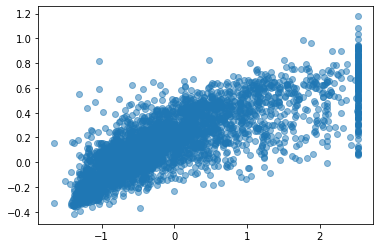

In [106]:
plt.scatter(label_test, preds, alpha=0.5)

**Kesimpulan:**
Dari beberapa metode yang telah dilakukan, dapat kita ketahui bahwa metode random forest regression, SVR, dan XGBoost memiliki akurasi yang cukup baik. Untuk nilai tertinggi dari r2 diperoleh dengan metode XGBoost dengan nilai 0.826. Sementara jika dilihat dari scatter plot, random forest regressor memiliki grafik yang lebih bagus, karena pola persebaran datanya lebih jelas dan arahnya diagonal.